# CSCE 554 In Class
# Marvin Newlin


In [51]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

In [52]:
subcompact = np.array([3, 5, 3, 7, 6, 5, 3, 2, 1, 6])
compact = np.array([1, 3, 4, 7, 5, 6, 3, 2, 1, 7])
midsize = np.array([4, 1, 3, 5, 7, 1, 2, 4, 2, 7])
fullsize = np.array([3, 5, 7, 5, 10, 3, 4, 7, 2, 7])

subcompact_mean = subcompact.mean()
compact_mean = compact.mean()
midsize_mean = midsize.mean()
fullsize_mean = fullsize.mean()

n = 10
a = 4
N = a*n

mean_total = (subcompact_mean + compact_mean + 
              midsize_mean + fullsize_mean)/4

all_vals = np.array([])
all_vals = np.append(all_vals, subcompact)
all_vals = np.append(all_vals, compact)
all_vals = np.append(all_vals, midsize)
all_vals = np.append(all_vals, fullsize)


all_vals_diff = all_vals - all_vals.mean()

SST = np.dot(all_vals_diff.T,all_vals_diff)
print("SST:",SST)


SSTreat = n * ((subcompact_mean - mean_total)**2 + (midsize_mean - mean_total)**2 + 
                    (compact_mean - mean_total)**2 + (fullsize_mean - mean_total)**2 )


print("SSTreat",SSTreat)

SSE = SST - SSTreat

print("SSE:",SSE)

MSE = SSE/(N-a)

MSTreat = SSTreat/(a-1)

print("MSTreat",MSTreat)
print("MSE",MSE)

F0 = MSTreat/MSE

print("F0",F0)

p_val = 1 - stats.f.cdf(F0,a-1,N-a)

print("p-val",p_val)

SST: 196.975
SSTreat 16.674999999999997
SSE: 180.3
MSTreat 5.558333333333333
MSE 5.008333333333334
F0 1.10981697171381
p-val 0.3578235508277885


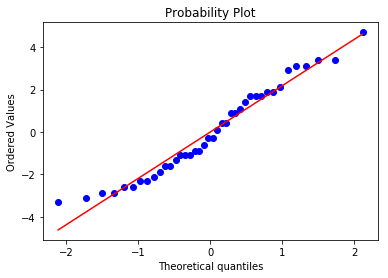

In [53]:
r1 = subcompact - subcompact_mean
r2 = compact - compact_mean
r3 = midsize - midsize_mean
r4 = fullsize - fullsize_mean
resid = np.hstack((r1, r2, r3, r4))
stats.probplot(resid, plot=plt)
plt.show()

In [54]:
vals = np.array([84.99, 84.04, 84.38,
                 85.15, 85.13, 84.88,
                 84.72, 84.48, 85.16,
                 84.20, 84.10, 84.55])
c1 = np.array([84.99, 84.04, 84.38])
c2 = np.array([85.15, 85.13, 84.88])
c3 = np.array([84.72, 84.48, 85.16])
c4 = np.array([84.20, 84.10, 84.55])


a = 4
n = 3
N = a*n

total_mean = vals.mean()

total_diff = vals - total_mean

SST = np.dot(total_diff.T,total_diff)

SSTreat = n * ((total_mean-c1.mean())**2 + (total_mean-c2.mean())**2
                + (total_mean-c3.mean())**2 + (total_mean-c4.mean())**2)
SSE = SST- SSTreat
MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)

F0 = MSTreat/MSE

p_val = 1 - stats.f.cdf(F0,MSTreat,MSE)

print("SST",SST)
print("SSTreat",SSTreat)
print("SSE",SSE)
print("MSTreat",MSTreat)
print("MSE",MSE)
print("F0",F0)
print("P-val",p_val)


SST 1.9027666666666565
SSTreat 1.0445666666666225
SSE 0.858200000000034
MSTreat 0.34818888888887417
MSE 0.10727500000000426
F0 3.2457598591364283
P-val 0.6819915338474609


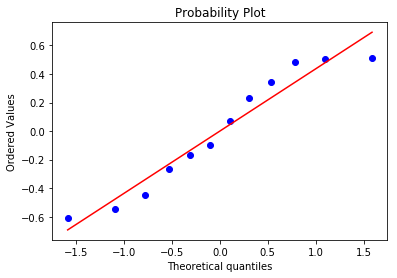

In [55]:
stats.probplot(total_diff, plot=plt)
plt.show()

The practical interpretation of this interval is that the 95% of the mean thicknesses of the wafers baked at the higher temperatures will fall be somewhere in the above interval less than the wafers baked at the lower temperature. We know that it is less because the t-score was negative.

In [56]:
mu = 10
rand_1 = np.random.randint(4,9)
model_1 = np.random.randn(rand_1,1) + mu
n_1 = model_1.size
model_1_mean = model_1.mean()

rand_2 = np.random.randint(4,9)
model_2 = np.random.randn(rand_2,1) + mu
n_2 = model_2.size
model_2_mean = model_2.mean()

rand_3 = np.random.randint(4,9)
model_3 = np.random.randn(rand_3,1) + mu
n_3 = model_3.size
model_3_mean = model_3.mean()

rand_4 = np.random.randint(4,9)
model_4 = np.random.randn(rand_4,1) + mu
n_4 = model_4.size
model_4_mean = model_4.mean()

rand_5 = np.random.randint(4,9)
model_5 = np.random.randn(rand_5,1) + mu
n_5 = model_5.size
model_5_mean = model_5.mean()

model = np.array([])
model = np.append(model,model_1)
model = np.append(model,model_2)
model = np.append(model,model_3)
model = np.append(model,model_4)
model = np.append(model,model_5)

model_mean = model.mean()

model_diff = model - model_mean

model_mean_diff = np.array([model_1_mean, model_2_mean, model_3_mean, model_4_mean, model_5_mean])
model_mean_diff = model_mean_diff - model_mean

SST = np.dot(model_diff.T,model_diff)
SSTreat = model_mean_diff[0]*n_1 + model_mean_diff[1]+n_2 + model_mean_diff[2]*n_3 + model_mean_diff[3]*n_4 + model_mean_diff[4]*n_5
SSE = SST - SSTreat
a = 5
N = n_1 + n_2 + n_3 + n_4 + n_5
MSTreat = SSTreat/(a-1)
MSE = SSE/(N-a)
F_0 = MSTreat/MSE
p_val = 1-stats.f.cdf(F_0,MSTreat,MSE)

print(p_val)

0.5005736571957657


In [57]:
### Working on getting table vals



In [58]:
one = np.array([28., 25., 27.])
a = np.array([36., 32., 32.])
b = np.array([18., 19., 23.])
ab = np.array([31., 30., 29.])
n = 3
data = np.array([[b, ab],
                 [one, a]])
total_mean = np.mean(data)
print(np.mean(data))

contrast_A = (np.sum(ab-b)+np.sum(a-one))
contrast_B = (np.sum(ab)+np.sum(b)-np.sum(a)-np.sum(one))
contrast_AB = (np.sum(ab)+np.sum(one)-np.sum(a)-np.sum(b))
print("Contrast A",contrast_A)
print("Contrast B",contrast_B)
print("Contrast AB",contrast_AB)

effect_A = (1/(2*n))*(np.sum(ab-b)+np.sum(a-one))
effect_B = (1/(2*n))*(np.sum(ab)+np.sum(b)-np.sum(a)-np.sum(one))
effect_AB = (1/(2*n))*(np.sum(ab)+np.sum(one)-np.sum(a)-np.sum(b))

print("Effect A",effect_A)
print("Effect B",effect_B)
print("Effect AB",effect_AB)

SSA = (contrast_A**2)/(4*n)
SSB = (contrast_B**2)/(4*n)
SSAB = (contrast_AB**2)/(4*n)

print("SSA: {}".format(SSA))
print("SSB: {}".format(SSB))
print("SSAB: {}".format(SSAB))

SST = np.sum(np.square(data - total_mean))
print("SST: {}".format(SST))
SSE = SST - SSA - SSB - SSAB
print("SSE: {}".format(SSE))

MSA = SSA
MSB = SSB
MSAB = SSAB
MSE = SSE/(4*(n-1))
print("MSA: {}".format(MSA))
print("MSB: {}".format(MSB))
print("MSAB: {}".format(MSAB))
print("MSE: {}".format(MSE))

F0_A = MSA/MSE
F0_B = MSB/MSE
F0_AB = MSAB/MSE

print("F0_A: {}".format(F0_A))
print("F0_B: {}".format(F0_B))
print("F0_AB: {}".format(F0_AB))

p_val_A = 1 - stats.f.cdf(F0_A, 1,4*(n-1))
p_val_B = 1 - stats.f.cdf(F0_B, 1,4*(n-1))
p_val_AB = 1 - stats.f.cdf(F0_AB, 1,4*(n-1))
print("p_val_A: {}".format(p_val_A))
print("p_val_B: {}".format(p_val_B))
print("p_val_AB: {}".format(p_val_AB))

27.5
Contrast A 50.0
Contrast B -30.0
Contrast AB 10.0
Effect A 8.333333333333332
Effect B -5.0
Effect AB 1.6666666666666665
SSA: 208.33333333333334
SSB: 75.0
SSAB: 8.333333333333334
SST: 323.0
SSE: 31.33333333333332
MSA: 208.33333333333334
MSB: 75.0
MSAB: 8.333333333333334
MSE: 3.916666666666665
F0_A: 53.19148936170215
F0_B: 19.148936170212774
F0_AB: 2.127659574468086
p_val_A: 8.443716930006673e-05
p_val_B: 0.0023615707965171095
p_val_AB: 0.1827764806804597


## 6.9

In [59]:
one = np.array([18.2, 18.9, 12.9, 14.4])
a = np.array([27.2, 24.0, 22.4, 22.5])
b = np.array([15.9, 14.5, 15.1, 14.2])
ab = np.array([41.0, 43.9, 36.3, 39.9])
n = 4

data = np.array([[b, ab],
                 [one, a]])
total_mean = np.mean(data)
print(np.mean(data))

contrast_A = (np.sum(ab-b)+np.sum(a-one))
contrast_B = (np.sum(ab)+np.sum(b)-np.sum(a)-np.sum(one))
contrast_AB = (np.sum(ab)+np.sum(one)-np.sum(a)-np.sum(b))
print("Contrast A",contrast_A)
print("Contrast B",contrast_B)
print("Contrast AB",contrast_AB)

effect_A = (1/(2*n))*(np.sum(ab-b)+np.sum(a-one))
effect_B = (1/(2*n))*(np.sum(ab)+np.sum(b)-np.sum(a)-np.sum(one))
effect_AB = (1/(2*n))*(np.sum(ab)+np.sum(one)-np.sum(a)-np.sum(b))

print("Effect A",effect_A)
print("Effect B",effect_B)
print("Effect AB",effect_AB)

SSA = (contrast_A**2)/(4*n)
SSB = (contrast_B**2)/(4*n)
SSAB = (contrast_AB**2)/(4*n)

print("SSA: {}".format(SSA))
print("SSB: {}".format(SSB))
print("SSAB: {}".format(SSAB))

total_diff = data - total_mean
            
SST = np.sum(np.square(total_diff))
print("SST: {}".format(SST))
SSE = SST - SSA - SSB - SSAB
print("SSE: {}".format(SSE))
sum_squares = np.array([SSA, SSB, SSAB, SSE, SST])
MSA = SSA
MSB = SSB
MSAB = SSAB
MSE = SSE/(4*(n-1))
print("MSA: {}".format(MSA))
print("MSB: {}".format(MSB))
print("MSAB: {}".format(MSAB))
print("MSE: {}".format(MSE))
mean_squares = np.array([MSA, MSB, MSAB, MSE,0])
F0_A = MSA/MSE
F0_B = MSB/MSE
F0_AB = MSAB/MSE
f_vals = np.array([F0_A, F0_B, F0_AB, 0, 0])
DF_A = 1
DF_B = 1
DF_AB = 1
DF_T = 4*n-1
DF_E = 4*(n-1)
DF = np.array([DF_A, DF_B, DF_AB, DF_E, DF_T])
print("F0_A: {}".format(F0_A))
print("F0_B: {}".format(F0_B))
print("F0_AB: {}".format(F0_AB))
alpha = 0.05
f_crit_a = stats.f.ppf(1-alpha,DF_A,DF_E)
f_crit_b = stats.f.ppf(1-alpha,DF_B,DF_E)
f_crit_ab = stats.f.ppf(1-alpha,DF_AB,DF_E)
f_crits = np.array([f_crit_a, f_crit_b, f_crit_ab,0, 0])
p_val_A = 1 - stats.f.cdf(F0_A, DF_A,DF_E)
p_val_B = 1 - stats.f.cdf(F0_B, DF_B,DF_E)
p_val_AB = 1 - stats.f.cdf(F0_AB, DF_AB,DF_E)
print("p_val_A: {}".format(p_val_A))
print("p_val_B: {}".format(p_val_B))
print("p_val_AB: {}".format(p_val_AB))
pvals = np.array([p_val_A, p_val_B, p_val_AB, 0,0])

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, pvals])
vals_df = pd.DataFrame(data=vals_data.T, index=['A', 'B', 'AB', 'Error', 'Total'], 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)


23.831250000000004
Contrast A 133.1
Contrast B 60.300000000000026
Contrast AB 69.7
Effect A 16.6375
Effect B 7.537500000000003
Effect AB 8.7125
SSA: 1107.2256249999998
SSB: 227.25562500000018
SSAB: 303.630625
SST: 1709.834375
SSE: 71.72249999999991
MSA: 1107.2256249999998
MSB: 227.25562500000018
MSAB: 303.630625
MSE: 5.976874999999993
F0_A: 185.25159468785967
F0_B: 38.022482484576045
F0_AB: 50.800899299383104
p_val_A: 1.1746693284742094e-08
p_val_B: 4.8262917816899176e-05
p_val_AB: 1.2010783458915597e-05


,Sum of Squares,Degrees of Freedom,Mean Square,F0,F Threshold,p-value
A,1107.225625,1.0,1107.23,185.252,4.74723,1.17467e-08
B,227.255625,1.0,227.256,38.0225,4.74723,4.82629e-05
AB,303.630625,1.0,303.631,50.8009,4.74723,1.20108e-05
Error,71.722500,12.0,5.97687,,,
Total,1709.834375,15.0,,,,


a) Analyze the data from this experiment.
(b) Construct a normal probability plot of the residuals, and
plot the residuals versus the predicted vibration level.
Interpret these plots.
(c) Draw the AB interaction plot. Interpret this plot.
What levels of bit size and speed would you recommend
for routine operation?

### Answer: Significant effect from changing A, B, and the interaction

## Example 3 Factor 
### example 6.1 p.243

In [67]:
ones = np.array([550., 604.])
a = np.array([669., 650.])
b = np.array([633., 601.])
ab = np.array([642., 635.])
c = np.array([1037., 1052.])
ac = np.array([749., 868.])
bc = np.array([1075., 1063.])
abc = np.array([729., 860.])
print("1: {}".format(ones.sum()))
print("a: {}".format(a.sum()))
print("b: {}".format(b.sum()))
print("c: {}".format(c.sum()))
print("ab: {}".format(ab.sum()))
print("ac: {}".format(ac.sum()))
print("bc: {}".format(bc.sum()))
print("abc: {}".format(abc.sum()))

n = 2
k = 3
alpha = 0.05

total = np.array([ones, a, b, c, ab, ac, bc, abc])
total_mean = np.mean(total)


# Contrasts
contrast_A =  np.sum(a) - np.sum(ones) + np.sum(ab) - np.sum(b) + np.sum(ac) - np.sum(c) + np.sum(abc) - np.sum(bc)
contrast_B =  np.sum(b - ones - a + ab - ac - c + bc + abc)
contrast_C =  np.sum(c + ac + bc + abc - ones - a - b -ab)
contrast_AB = np.sum(ab - a - b + ones + abc - bc - ac + c)
contrast_AC = np.sum(ones - a + b - ab - c + ac - bc + abc)
contrast_BC = np.sum(ones + a - b - ab - c - ac + bc + abc)
contrast_ABC= np.sum(abc - bc - ac + c - ab + b + a - ones)

# Sum of Squares
SSA = (np.square(contrast_A))/(8*n)
SSB = (np.square(contrast_B))/(n*np.power(2,k))
SSAB = (np.square(contrast_C))/(n*np.power(2,k))
SSC = (np.square(contrast_AB))/(n*np.power(2,k))
SSAC = (np.square(contrast_AC))/(n*np.power(2,k))
SSBC = (np.square(contrast_BC))/(n*np.power(2,k))
SSABC = (np.square(contrast_ABC))/(n*np.power(2,k))
SST = np.sum(np.square(total - total_mean))
SSE = SST - SSA - SSB - SSAB - SSC - SSAC - SSBC - SSABC
sum_squares = np.array([SSA, SSB, SSC, SSAB, SSAC, SSBC, SSABC, SSE, SST])

# Effects
effect_A = contrast_A/(4*n)
effect_B = contrast_B/(4*n)
effect_C = contrast_C/(4*n)
effect_AB = contrast_AB/(4*n)
effect_AC = contrast_AC/(4*n)
effect_BC = contrast_BC/(4*n)
effect_ABC = contrast_ABC/(4*n)
effects = np.array([effect_A, effect_B, effect_C, effect_AB, effect_AC, effect_BC, effect_ABC])

effect_names = ['A', 'B', 'C', 'AB', 'AC', 'BC', 'ABC']
print(" \tEffect\tSum of Squares")
for x in range(7):
    print("{}\t{:-10.3f}\t{:-10.3f}".format(effect_names[x], effects[x], sum_squares[x]))


# Degrees of Freedom
DF_A = 1
DF_B = 1
DF_AB = 1
DF_C = 1 
DF_AC = 1
DF_BC = 1
DF_ABC = 1
DF_T = n*(np.power(2,k)-1)
DF_E = np.power(2,k)*(n-1)
DF = np.array([DF_A, DF_B, DF_AB, DF_C, DF_AC, DF_BC, DF_ABC, DF_E, DF_T])

# Mean Squares
MSA = SSA/DF_A
MSB = SSB/DF_B
MSAB = SSAB/DF_AB
MSC = SSC/DF_C
MSAC = SSAC/DF_AC
MSBC = SSBC/DF_BC
MSABC = SSABC/DF_ABC
MSE = SSE/DF_E
mean_squares = np.array([MSA, MSB, MSAB, MSC, MSAC, MSBC, MSABC, MSE,0])

# F0 vals
F0_A = MSA/MSE
F0_B = MSB/MSE
F0_AB = MSAB/MSE
F0_C = MSC/MSE
F0_AC = MSAC/MSE
F0_BC = MSBC/MSE
F0_ABC = MSABC/MSE
f_vals = np.array([F0_A, F0_B, F0_AB, F0_C, F0_AC, F0_BC, F0_ABC, 0, 0])

# F threshold vals
f_crit_a = stats.f.ppf(1-alpha,DF_A,DF_E)
f_crit_b = stats.f.ppf(1-alpha,DF_B,DF_E)
f_crit_ab = stats.f.ppf(1-alpha,DF_AB,DF_E)
f_crit_c = stats.f.ppf(1-alpha,DF_C,DF_E)
f_crit_ac = stats.f.ppf(1-alpha,DF_AC,DF_E)
f_crit_bc = stats.f.ppf(1-alpha,DF_BC,DF_E)
f_crit_abc = stats.f.ppf(1-alpha,DF_ABC,DF_E)
f_crits = np.array([f_crit_a, f_crit_b, f_crit_ab, f_crit_c, f_crit_ac, f_crit_bc, f_crit_abc, 0, 0])

# P values
p_val_A = 1 - stats.f.cdf(F0_A, DF_A,DF_E)
p_val_B = 1 - stats.f.cdf(F0_B, DF_B,DF_E)
p_val_AB = 1 - stats.f.cdf(F0_AB, DF_AB,DF_E)
p_val_C = 1 - stats.f.cdf(F0_C, DF_C,DF_E)
p_val_AC = 1 - stats.f.cdf(F0_AC, DF_AC,DF_E)
p_val_BC = 1 - stats.f.cdf(F0_BC, DF_BC,DF_E)
p_val_ABC = 1 - stats.f.cdf(F0_ABC, DF_ABC,DF_E)
pvals = np.array([p_val_A, p_val_B, p_val_AB, p_val_C, p_val_AC, p_val_BC, p_val_ABC, 0,0])

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, pvals])
vals_df = pd.DataFrame(data=vals_data.T, index=['A', 'B', 'AB', 'C', 'AC', 'BC', 'ABC', 'Error', 'Total'], 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)

1: 1154.0
a: 1319.0
b: 1234.0
c: 2089.0
ab: 1277.0
ac: 1617.0
bc: 2138.0
abc: 1589.0
 	Effect	Sum of Squares
A	  -101.625	 41310.562
B	     7.375	   217.562
C	   306.125	  2475.062
AB	   -24.875	374850.062
AC	  -153.625	 94402.562
BC	    -2.125	    18.062
ABC	     5.625	   126.562


,Sum of Squares,Degrees of Freedom,Mean Square,F0,F Threshold,p-value
A,41310.5625,1.0,41310.6,18.3394,5.31766,0.00267861
B,217.5625,1.0,217.562,0.0965844,5.31766,0.763911
AB,2475.0625,1.0,374850,166.411,5.31766,1.23326e-06
C,374850.0625,1.0,2475.06,1.09878,5.31766,0.325168
AC,94402.5625,1.0,94402.6,41.909,5.31766,0.000193396
BC,18.0625,1.0,18.0625,0.00801865,5.31766,0.930849
ABC,126.5625,1.0,126.562,0.056186,5.31766,0.818586
Error,18020.5000,8.0,2252.56,,,
Total,531420.9375,14.0,,,,


## Regression

[1.5  3.08]


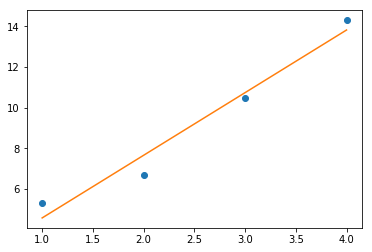

In [61]:
x = np.array([1, 2, 3, 4])
y = np.array([5.3, 6.7, 10.5, 14.3])

X = np.vstack((np.ones((1,4)), x)).T
XTX_inv= np.linalg.inv(np.dot(X.T, X))

# Beta = (X^T*X)^(-1)*X^T*y
beta = np.dot(np.dot(XTX_inv, X.T),y)
print(beta)

plt.plot(x,y, 'o')
plt.plot(x, (beta[0]+beta[1]*x))
plt.show()


[4.47903226 1.22580645]


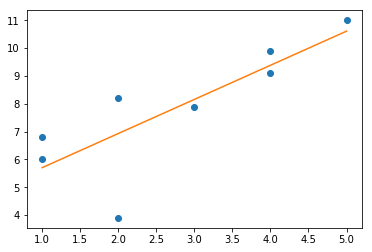

In [62]:
x = np.array([1,1,2,2,3,4,4,5])
y = np.array([6.8, 6., 3.9, 8.2, 7.9, 9.1, 9.9, 11.])
X = np.vstack((np.ones((1,8)), x)).T
XTX_inv= np.linalg.pinv(np.dot(X.T, X))

# Beta = (X^T*X)^(-1)*X^T*y
beta = np.dot(np.dot(XTX_inv, X.T),y)
print(beta)

plt.plot(x,y, 'o')
plt.plot(x, (beta[0]+beta[1]*x))
plt.show()

In [63]:
x1 = np.array([1,1,1,2,2, 2, 3,3,3, 4,4,4])
y1 = np.array([100., 95., 105., 98., 94., 96., 89., 88., 91., 86., 85., 87.])
X = np.vstack((np.ones((1,12)), x1)).T
"""
XTX_inv= np.linalg.pinv(np.dot(X.T, X))
# Beta = (X^T*X)^(-1)*X^T*y
beta = np.dot(np.dot(XTX_inv, X.T),y)
print(beta)

plt.plot(x1,y, 'o')
plt.plot(x1, (beta[0]+beta[1]*x1))
plt.show()

y_est = beta[0] + beta[1]*x1
print(y_est)

t1 = np.square(y_est[0] - 100)*3 # 3 is # of replicates
t2 = np.square(y_est[3] - 96)*3
t3 = np.square(y_est[6] - 89.3333333333)*3
t4 = np.square(y_est[9] - 86)*3
print(t1)
print(t2)
print(t3)
print(t4)

# ANOVA
SSTotal = np.sum(np.square(y1 - beta[0] - beta[1]*x1))
print("SST: {}".format(SSTotal))
SSTreat = t1 + t2 + t3 + t4
SSE = SSTotal - SSTreat
MSTreat = SSTreat/3
MSE = SSE/7
print("SSTreat: {}".format(SSTreat))
print("MSTreat: {}".format(MSTreat))
print("SSE: {}".format(SSE))
print("MSE: {}".format(MSE))


signs = np.array([[-1, -1, -1 ],
                  [ 1, -1, -1 ],
                  [-1,  1, -1 ],
                  [ 1,  1, -1 ],
                  [-1, -1,  1 ],
                  [ 1, -1,  1 ],
                  [-1,  1,  1 ],
                  [ 1,  1,  1 ]])
                  
                  signs = np.array([[-1, -1, -1, -1],
                  [ 1, -1, -1, -1],
                  [-1,  1, -1, -1],
                  [ 1,  1, -1, -1],
                  [-1, -1,  1, -1],
                  [ 1, -1,  1, -1],
                  [-1,  1,  1, -1],
                  [ 1,  1,  1, -1],
                  [-1, -1, -1,  1],
                  [ 1, -1, -1,  1],
                  [-1,  1, -1,  1],
                  [ 1,  1, -1,  1],
                  [-1, -1,  1,  1],
                  [ 1, -1,  1,  1],
                  [-1,  1,  1,  1],
                  [ 1,  1,  1,  1]])

"""

'\nXTX_inv= np.linalg.pinv(np.dot(X.T, X))\n# Beta = (X^T*X)^(-1)*X^T*y\nbeta = np.dot(np.dot(XTX_inv, X.T),y)\nprint(beta)\n\nplt.plot(x1,y, \'o\')\nplt.plot(x1, (beta[0]+beta[1]*x1))\nplt.show()\n\ny_est = beta[0] + beta[1]*x1\nprint(y_est)\n\nt1 = np.square(y_est[0] - 100)*3 # 3 is # of replicates\nt2 = np.square(y_est[3] - 96)*3\nt3 = np.square(y_est[6] - 89.3333333333)*3\nt4 = np.square(y_est[9] - 86)*3\nprint(t1)\nprint(t2)\nprint(t3)\nprint(t4)\n\n# ANOVA\nSSTotal = np.sum(np.square(y1 - beta[0] - beta[1]*x1))\nprint("SST: {}".format(SSTotal))\nSSTreat = t1 + t2 + t3 + t4\nSSE = SSTotal - SSTreat\nMSTreat = SSTreat/3\nMSE = SSE/7\nprint("SSTreat: {}".format(SSTreat))\nprint("MSTreat: {}".format(MSTreat))\nprint("SSE: {}".format(SSE))\nprint("MSE: {}".format(MSE))\n'

In [64]:
var_hat = np.sum(np.square(y1 - y1.mean())/(3-2)) # denom: n - p
beta_cov = var_hat*XTX_inv
print(beta_cov)

[[260.89247312 -75.52150538]
 [-75.52150538  27.46236559]]


In [70]:
one = np.array([45])
a = np.array([71])
b = np.array([48])
ab = np.array([65])
c = np.array([68])
ac = np.array([60])
bc = np.array([80])
abc = np.array([65])
d = np.array([43])
ad = np.array([100])
bd = np.array([45])
abd = np.array([104])
cd = np.array([75])
acd = np.array([86])
bcd = np.array([70])
abcd = np.array([96])
n=1
k=4
"""
np.array([[-1,-1,1,-1,1,1,-1,-1,1,1,-1,1,-1,-1,1],
            [+,−,−,−,−,+,+,−,−,+,+,+,+,−,−],
            [−,+,−,−,+,−,+,−,+,−,+,+,−,+,−],
            [+,+,+,−,−,−,−,−,−,−,−,+,+,+,+],
            [−,−,+,+,−,−,+,−,+,+,−,−,+,+,−],
            [+,−,−,+,+,−,−,−,−,+,+,−,−,+,+],
            [−,+,−,+,−,+,−,−,+,−,+,−,+,−,+],
            [+,+,+,+,+,+,+,−,−,−,−,−,−,−,−],
            [−,−,+,−,+,+,−,+,−,−,+,−,+,+,−],
            [+,−,−,−,−,+,+,+,+,−,−,−,−,+,+],
            [−,+,−,−,+,−,+,+,−,+,−,−,+,−,+],
            [+,+,+,−,−,−,−,+,+,+,+,−,−,−,−],
            [−,−,+,+,−,−,+,+,−,−,+,+,−,−,+],
            [+,−,−,+,+,−,−,+,+,−,−,+,+,−,−],
            [−,+,−,+,−,+,−,+,−,+,−,+,−,+,−],
            [+,+,+,+,+,+,+,+,+,+,+,+,+,+,+]])
"""
contrast_A = np.sum(-one + a - b + ab - c + ac - bc + abc - d + ad - bd + abd - cd + acd - bcd + abcd)
contrast_B = np.sum(-one - a + b + ab - c - ac + bc + abc - d - ad + bd + abd - cd - acd + bcd + abcd)
contrast_AB = np.sum(one - a - b + ab + c - ac - bc + abc + d - ad - bd + abd + cd - acd - bcd + abcd)
contrast_C = np.sum(-one - a - b - ab + c + ac + bc + abc - d - ad - bd - abd + cd + acd + bcd + abcd)
contrast_AC = np.sum(one - a + b - ab - c + ac - bc + abc + d - ad + bd - abd - cd + acd - bcd + abcd)
contrast_BC = np.sum(one + a - b - ab - c - ac + bc + abc + d + ad - bd - abd - cd - acd + bcd + abcd)
contrast_ABC= np.sum(-one+ a + b - ab + c - ac - bc + abc - d + ad + bd - abd + cd - acd - bcd + abcd)
contrast_D =  np.sum(-one- a - b - ab - c - ac - bc - abc + d + ad + bd + abd + cd + acd + bcd + abcd)
contrast_AD=  np.sum(one - a + b - ab + c - ac + bc - abc - d + ad - bd + abd - cd + acd - bcd + abcd)
contrast_BD = np.sum(one + a - b - ab + c + ac - bc - abc - d - ad + bd + abd - cd - acd + bcd + abcd)
contrast_ABD= np.sum(-one + a + b - ab - c + ac + bc - abc + d - ad - bd + abd + cd - acd - bcd + abcd)
contrast_CD = np.sum(one + a + b + ab - c - ac - bc - abc - d - ad - bd - abd + cd + acd + bcd + abcd)
contrast_ACD = np.sum(-one + a - b + ab + c - ac + bc - abc + d - ad + bd - abd - cd + acd - bcd + abcd)
contrast_BCD = np.sum(-one - a + b + ab + c + ac - bc - abc + d + ad - bd - abd - cd - acd + bcd + abcd)
contrast_ABCD = np.sum(one - a - b + ab - c + ac + bc - abc - d + ad + bd - abd + cd - acd - bcd + abcd)
contrasts_all = np.array([contrast_A, contrast_B, contrast_AB, contrast_C, contrast_AC, contrast_BC, contrast_ABC,
                         contrast_D, contrast_AD, contrast_BD, contrast_ABD, contrast_CD, contrast_ACD, contrast_BCD,
                         contrast_ABCD])
num_effects = np.power(2,k)-1
effects = np.ones(num_effects)
names = ['A', 'B', 'AB', 'C', 'AC', 'BC', 'ABC', 'D', 'AD', 'BD', 'ABD', 'CD', 'ACD', 'BCD', 'ABCD']
for i in range(num_effects):
    effects[i] = contrasts_all[i]/(n*np.power(2,k-1))
    print("{}: {}".format(names[i], effects[i]))


A: 21.625
B: 3.125
AB: 0.125
C: 9.875
AC: -18.125
BC: 2.375
ABC: 1.875
D: 14.625
AD: 16.625
BD: -0.375
ABD: 4.125
CD: -1.125
ACD: -1.625
BCD: -2.625
ABCD: 1.375


In [77]:
one = np.array([25])
a = np.array([71])
b = np.array([48])
ab = np.array([45])
c = np.array([68])
ac = np.array([40])
bc = np.array([60])
abc = np.array([65])
d = np.array([43])
ad = np.array([80])
bd = np.array([25])
abd = np.array([104])
cd = np.array([55])
acd = np.array([86])
bcd = np.array([70])
abcd = np.array([76])
n=8
k=4
num_blocks = 2
block_1 = np.array([one[0], ab[0], ac[0], bc[0], ad[0], bd[0], cd[0], abcd[0]])
block_2 = np.array([a[0], b[0], c[0], d[0], abc[0], bcd[0], acd[0], abd[0]])

block_effect = np.mean(block_1) - np.mean(block_2)
print(block_effect)

SSBlocks = (np.sum(block_1)**2 + np.sum(block_2)**2)/8 - (np.sum(block_1+block_2)**2)/(num_blocks*n)
print(SSBlocks)

-18.625
1387.5625
